# Created by: Team Extra Mile
## Team Member 
- Animesh Parikshya
- Dr. Anshika Sharma
- Tanisha Jain
- Arpit Dhawan

## Task - Prediction of Market Share of ChemX Pharma in current Pandamic

### Given Problem Statement - 1a)
- A. What will be the market Share of Chem-X and the top 10 companies in 2021? 

##### Note: 
- i. The top 10 companies will individually lose 2.2% of its revenue generated in 2020. The half (50%) of the lost revenue will go to ‘Chem-X’ and the rest to the others.
- ii. The revenue generated by a company is proportional to its market share. 

# Solution

### Step 1 : Importing required libraries

In [1]:
import os
import pandas as pd
import numpy as np
from pylab import rcParams
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

### Step 2 : Reading the dataset into a Pandas Dataframe

In [2]:
data_dir='C:/Users/Animesh.Parikshya/Documents/IIM Classes/Data sets'
os.chdir(data_dir)

In [3]:
#Reading the data
dat=pd.read_csv("Market_Share.csv")
dat

,Pharma Companies,Market Share (In 2020) (In percentage),Revenue Generated 2 (Billion INR)
0,Sun Pharmaceutical Industries Limited,6.84,273.28
1,Dr. Reddy's Laboratories,5.50,219.74
2,Glenmark Pharma Limited,4.43,176.99
3,Cadila Healthcare Limited,4.88,194.97
4,Lupin Limited,6.10,243.71
5,Mankind Pharma Limited,3.93,157.02
6,Intas Pharmaceuticals Limited,4.67,186.58
7,Cipla Limited,5.95,237.72
8,Aurobindo Pharma Limited,6.45,257.70
9,Torrent Pharmaceuticals Limited,4.25,169.80


In [4]:
#Renaming column name for easement
dat=dat.rename(columns={'Pharma Companies':'PC','Market Share (In 2020) (In percentage)':'MS_2020','Revenue Generated 2 (Billion INR)':'Rev_2020'})

In [5]:
dat

,PC,MS_2020,Rev_2020
0,Sun Pharmaceutical Industries Limited,6.84,273.28
1,Dr. Reddy's Laboratories,5.50,219.74
2,Glenmark Pharma Limited,4.43,176.99
3,Cadila Healthcare Limited,4.88,194.97
4,Lupin Limited,6.10,243.71
5,Mankind Pharma Limited,3.93,157.02
6,Intas Pharmaceuticals Limited,4.67,186.58
7,Cipla Limited,5.95,237.72
8,Aurobindo Pharma Limited,6.45,257.70
9,Torrent Pharmaceuticals Limited,4.25,169.80


In [6]:
# making a copy only for top 10 company
dat_Top10 = dat[0:10].copy()
dat_Top10

,PC,MS_2020,Rev_2020
0,Sun Pharmaceutical Industries Limited,6.84,273.28
1,Dr. Reddy's Laboratories,5.50,219.74
2,Glenmark Pharma Limited,4.43,176.99
3,Cadila Healthcare Limited,4.88,194.97
4,Lupin Limited,6.10,243.71
5,Mankind Pharma Limited,3.93,157.02
6,Intas Pharmaceuticals Limited,4.67,186.58
7,Cipla Limited,5.95,237.72
8,Aurobindo Pharma Limited,6.45,257.70
9,Torrent Pharmaceuticals Limited,4.25,169.80


### Step 3 : Exploratory Data Analysis

#### Shape of data

In [7]:
dat_Top10.shape

(10, 3)

#### Checking datatype of each column

In [8]:
dat_Top10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PC        10 non-null     object 
 1   MS_2020   10 non-null     float64
 2   Rev_2020  10 non-null     float64
dtypes: float64(2), object(1)
memory usage: 368.0+ bytes


#### Null Values in data

In [9]:
dat_Top10.isnull().sum()

PC          0
MS_2020     0
Rev_2020    0
dtype: int64

### Step 4: Solutions

In [10]:
# adding a new column with the revenue loss of 2.2%
dat_Top10["RevLoss"] = dat_Top10.Rev_2020 * 0.022
dat_Top10

,PC,MS_2020,Rev_2020,RevLoss
0,Sun Pharmaceutical Industries Limited,6.84,273.28,6.01216
1,Dr. Reddy's Laboratories,5.50,219.74,4.83428
2,Glenmark Pharma Limited,4.43,176.99,3.89378
3,Cadila Healthcare Limited,4.88,194.97,4.28934
4,Lupin Limited,6.10,243.71,5.36162
5,Mankind Pharma Limited,3.93,157.02,3.45444
6,Intas Pharmaceuticals Limited,4.67,186.58,4.10476
7,Cipla Limited,5.95,237.72,5.22984
8,Aurobindo Pharma Limited,6.45,257.70,5.66940
9,Torrent Pharmaceuticals Limited,4.25,169.80,3.73560


In [11]:
# adding a new column with new revenue
dat_Top10["Rev_New"] = dat_Top10.Rev_2020 - dat_Top10.RevLoss
dat_Top10

,PC,MS_2020,Rev_2020,RevLoss,Rev_New
0,Sun Pharmaceutical Industries Limited,6.84,273.28,6.01216,267.26784
1,Dr. Reddy's Laboratories,5.50,219.74,4.83428,214.90572
2,Glenmark Pharma Limited,4.43,176.99,3.89378,173.09622
3,Cadila Healthcare Limited,4.88,194.97,4.28934,190.68066
4,Lupin Limited,6.10,243.71,5.36162,238.34838
5,Mankind Pharma Limited,3.93,157.02,3.45444,153.56556
6,Intas Pharmaceuticals Limited,4.67,186.58,4.10476,182.47524
7,Cipla Limited,5.95,237.72,5.22984,232.49016
8,Aurobindo Pharma Limited,6.45,257.70,5.66940,252.03060
9,Torrent Pharmaceuticals Limited,4.25,169.80,3.73560,166.06440


In [12]:
# Checking total Revenue loss from top 10 Company
lostRev = round(dat_Top10.RevLoss.sum(),2)
lostRev

46.59

In [13]:
# Making a new copy to add ChemX and others company
dat_New = dat_Top10.copy()
# Adding others company
df2 = {'PC': 'others', 'MS_2020': dat.iloc[10]['MS_2020'], 'Rev_2020': dat.iloc[10]['Rev_2020'], 'RevLoss': 0, 'Rev_New': (dat.iloc[10]['Rev_2020'] + (lostRev/2)) } 
dat_New = dat_New.append(df2 , ignore_index=True) 
# adding ChemX
df3 = {'PC': 'Chem-x', 'MS_2020': dat.iloc[11]['MS_2020'], 'Rev_2020': dat.iloc[11]['Rev_2020'], 'RevLoss': 0, 'Rev_New': (dat.iloc[11]['Rev_2020'] + (lostRev/2)) } 
dat_New = dat_New.append(df3 , ignore_index=True) 

In [14]:
# Adding new column with new Market Share 
dat_New['MS_New'] = (dat_New.Rev_New/dat_New.Rev_New.sum()) * 100
dat_New

,PC,MS_2020,Rev_2020,RevLoss,Rev_New,MS_New
0,Sun Pharmaceutical Industries Limited,6.84,273.28,6.01216,267.26784,6.558374
1,Dr. Reddy's Laboratories,5.50,219.74,4.83428,214.90572,5.273482
2,Glenmark Pharma Limited,4.43,176.99,3.89378,173.09622,4.247536
3,Cadila Healthcare Limited,4.88,194.97,4.28934,190.68066,4.679033
4,Lupin Limited,6.10,243.71,5.36162,238.34838,5.848732
5,Mankind Pharma Limited,3.93,157.02,3.45444,153.56556,3.768281
6,Intas Pharmaceuticals Limited,4.67,186.58,4.10476,182.47524,4.477684
7,Cipla Limited,5.95,237.72,5.22984,232.49016,5.704979
8,Aurobindo Pharma Limited,6.45,257.70,5.66940,252.03060,6.184474
9,Torrent Pharmaceuticals Limited,4.25,169.80,3.73560,166.06440,4.074985


In [15]:
#Dropping the row with "Others" companies data as question asked only for Market share of CHEMX and top 10 company
dat_MS_ChemX_andTop10 = dat_New.drop(10)

In [16]:
dat_MS_ChemX_andTop10.columns

Index(['PC', 'MS_2020', 'Rev_2020', 'RevLoss', 'Rev_New', 'MS_New'], dtype='object')

In [17]:
dat_MS_ChemX_andTop10 = dat_MS_ChemX_andTop10.drop(['MS_2020', 'Rev_2020', 'RevLoss', 'Rev_New'], axis=1)

## 1A) Solution: - Market Share of Chem-X and the top 10 companies in 2021

In [18]:
dat_MS_ChemX_andTop10

,PC,MS_New
0,Sun Pharmaceutical Industries Limited,6.558374
1,Dr. Reddy's Laboratories,5.273482
2,Glenmark Pharma Limited,4.247536
3,Cadila Healthcare Limited,4.679033
4,Lupin Limited,5.848732
5,Mankind Pharma Limited,3.768281
6,Intas Pharmaceuticals Limited,4.477684
7,Cipla Limited,5.704979
8,Aurobindo Pharma Limited,6.184474
9,Torrent Pharmaceuticals Limited,4.074985


# ---------------------------------------------------------------------------------------------------------------

### Given Problem Statement - 1b)
- B. Also calculate the revenue generated by Chem-X in 2021 if the overall revenue generation for individual companies is increased by 5% of that in 2020. 

In [19]:
overall_Rev_2020 = dat.Rev_2020.sum()
overall_Rev_2020

4075.2100000000005

In [20]:
#Overall Revenue with 5% increase in 2021
overall_Rev_2021 = overall_Rev_2020 + (0.05*overall_Rev_2020)
overall_Rev_2021

4278.9705

## Chem-X revenue in 2021, assuming that the market share have not changed

In [21]:

ChemX_rev_2021 = round((dat.iloc[11]['MS_2020']/100) *4278.9705,2)
ChemX_rev_2021

85.58

## Chem-X revenue in 2021, assuming that the market share have changed as per question 1A above. 

In [22]:

ChemX_rev_2021 = round((dat_MS_ChemX_andTop10.iloc[10]['MS_New']/100) *4278.9705,2)
ChemX_rev_2021

108.35

# ---------------------------------------------------------------------------------------------------------------

### Given Problem Statement - 2)
- There was another competitor (Medical MoJo) which was established in 2010 and had the same profile and outlook as Chem-X. 
- How much revenue ChemX will be able to generate in 2031, considering ChemX grows at an average growth rate (across 10 years) as Medical MoJo.

##### Note:
- 1. The revenue for ChemX for 2021 to be leveraged from Question-1.1.
- 2. We expect a higher uptake (about 1.5) in the average growth from 2026, (not for subsequent years).
- 3. Another major competitor launch is planned for 2029 which leads to an expected slowdown in growth for ChemX and revenue is expected to become stagnant from 2028 onwards.


In [23]:
growth_rate=pd.read_csv("Growth_Rate_Medical_Mojo.csv")
growth_rate

,Year,Growth Rate
0,2011,12.32
1,2012,10.44
2,2013,17.56
3,2014,14.36
4,2015,8.01
5,2016,19.60
6,2017,-9.43
7,2018,4.28
8,2019,8.12
9,2020,2.30


##### As Medical Mojo and Chem- X have same profile and outlook , we can consider the growth rate as same. 

In [24]:
growth_rate_ChemX = growth_rate.copy()

##### Adding growth rate of 2021 from Q1A above as suggested in the question 

In [25]:
# Getting all the data from earlier data frame
dat_New

,PC,MS_2020,Rev_2020,RevLoss,Rev_New,MS_New
0,Sun Pharmaceutical Industries Limited,6.84,273.28,6.01216,267.26784,6.558374
1,Dr. Reddy's Laboratories,5.50,219.74,4.83428,214.90572,5.273482
2,Glenmark Pharma Limited,4.43,176.99,3.89378,173.09622,4.247536
3,Cadila Healthcare Limited,4.88,194.97,4.28934,190.68066,4.679033
4,Lupin Limited,6.10,243.71,5.36162,238.34838,5.848732
5,Mankind Pharma Limited,3.93,157.02,3.45444,153.56556,3.768281
6,Intas Pharmaceuticals Limited,4.67,186.58,4.10476,182.47524,4.477684
7,Cipla Limited,5.95,237.72,5.22984,232.49016,5.704979
8,Aurobindo Pharma Limited,6.45,257.70,5.66940,252.03060,6.184474
9,Torrent Pharmaceuticals Limited,4.25,169.80,3.73560,166.06440,4.074985


In [26]:
# Getting Revenue of 2020
dat_New.iloc[11]['Rev_2020']

79.9

In [27]:
# Getting Revenue of 2020
dat_New.iloc[11]['Rev_New']

103.19500000000001

In [28]:
growth_2021 = round(((dat_New.iloc[11]['Rev_New'] - dat_New.iloc[11]['Rev_2020'])/ dat_New.iloc[11]['Rev_2020'])* 100,2)
growth_2021

29.16

In [29]:
df_Growth2021 = {'Year': 2021, 'Growth Rate': growth_2021  } 
growth_rate_ChemX = growth_rate_ChemX.append(df_Growth2021 , ignore_index=True) 
growth_rate_ChemX

,Year,Growth Rate
0,2011.0,12.32
1,2012.0,10.44
2,2013.0,17.56
3,2014.0,14.36
4,2015.0,8.01
5,2016.0,19.60
6,2017.0,-9.43
7,2018.0,4.28
8,2019.0,8.12
9,2020.0,2.30


In [30]:
growth_rate_ChemX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         11 non-null     float64
 1   Growth Rate  11 non-null     float64
dtypes: float64(2)
memory usage: 304.0 bytes


In [31]:
growth_rate_ChemX_original = growth_rate_ChemX.copy()

In [32]:
growth_rate_ChemX.Year = growth_rate_ChemX.Year.astype(int)
growth_rate_ChemX.Year = growth_rate_ChemX.Year.astype(str)
growth_rate_ChemX


,Year,Growth Rate
0,2011,12.32
1,2012,10.44
2,2013,17.56
3,2014,14.36
4,2015,8.01
5,2016,19.60
6,2017,-9.43
7,2018,4.28
8,2019,8.12
9,2020,2.30


In [33]:
growth_rate_ChemX['DateTime'] = '31-Dec-' + growth_rate_ChemX.Year

In [34]:
growth_rate_ChemX

,Year,Growth Rate,DateTime
0,2011,12.32,31-Dec-2011
1,2012,10.44,31-Dec-2012
2,2013,17.56,31-Dec-2013
3,2014,14.36,31-Dec-2014
4,2015,8.01,31-Dec-2015
5,2016,19.60,31-Dec-2016
6,2017,-9.43,31-Dec-2017
7,2018,4.28,31-Dec-2018
8,2019,8.12,31-Dec-2019
9,2020,2.30,31-Dec-2020


In [35]:
growth_rate_ChemX.DateTime = pd.to_datetime(growth_rate_ChemX.DateTime)
growth_rate_ChemX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Year         11 non-null     object        
 1   Growth Rate  11 non-null     float64       
 2   DateTime     11 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 392.0+ bytes


In [36]:
growth_rate_ChemX_TS = growth_rate_ChemX

In [37]:
growth_rate_ChemX_TS = growth_rate_ChemX_TS.drop(['Year'], axis=1)

In [38]:
growth_rate_ChemX_TS = growth_rate_ChemX_TS[['DateTime', 'Growth Rate']]
growth_rate_ChemX_TS

,DateTime,Growth Rate
0,2011-12-31,12.32
1,2012-12-31,10.44
2,2013-12-31,17.56
3,2014-12-31,14.36
4,2015-12-31,8.01
5,2016-12-31,19.60
6,2017-12-31,-9.43
7,2018-12-31,4.28
8,2019-12-31,8.12
9,2020-12-31,2.30


In [39]:
#growth_rate_ChemX_TS = growth_rate_ChemX_TS.set_index('DateTime')

In [40]:
growth_rate_ChemX_TS

,DateTime,Growth Rate
0,2011-12-31,12.32
1,2012-12-31,10.44
2,2013-12-31,17.56
3,2014-12-31,14.36
4,2015-12-31,8.01
5,2016-12-31,19.60
6,2017-12-31,-9.43
7,2018-12-31,4.28
8,2019-12-31,8.12
9,2020-12-31,2.30


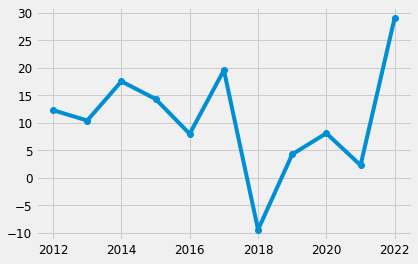

In [41]:
plt.plot_date(growth_rate_ChemX_TS.DateTime, growth_rate_ChemX_TS['Growth Rate'], linestyle='solid')

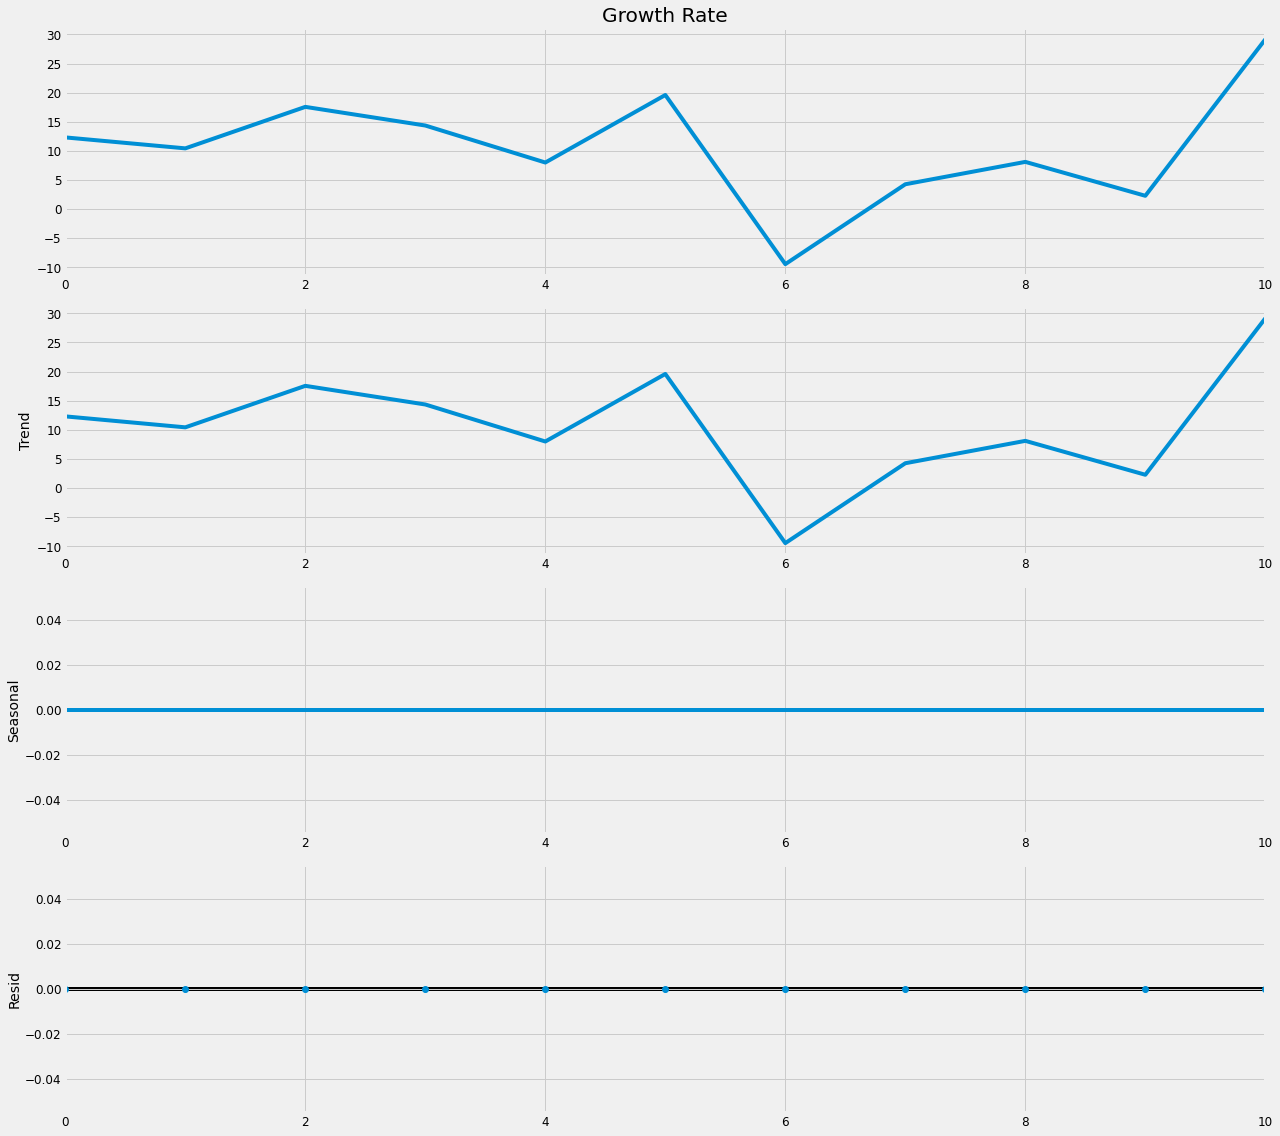

In [42]:
y = growth_rate_ChemX_TS['Growth Rate']
rcParams['figure.figsize'] = 18, 16
decomposition = sm.tsa.seasonal_decompose(y, model='additive', period=1)
fig = decomposition.plot()
plt.show()

In [43]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 0, 0),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5217      0.387      1.350      0.177      -0.236       1.279
sigma2       171.9086     80.578      2.133      0.033      13.978     329.839


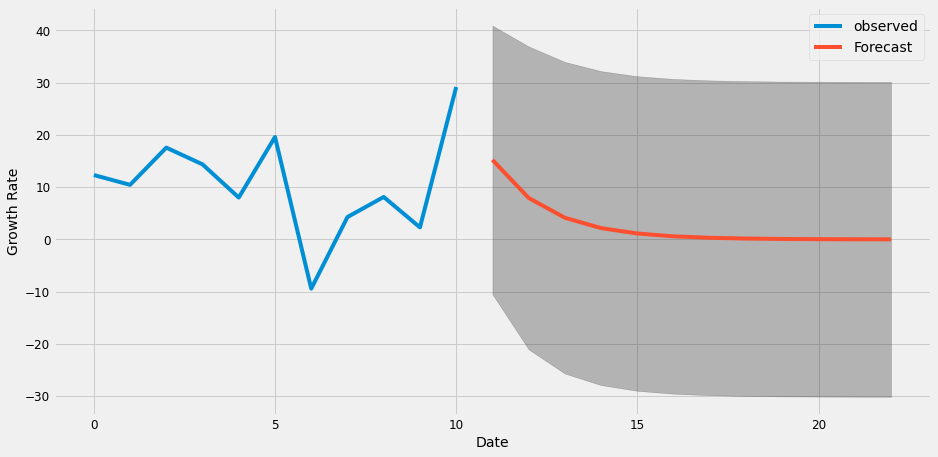

In [44]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Growth Rate')
plt.legend()
plt.show()

In [45]:
pred_ci

,lower Growth Rate,upper Growth Rate
11,-10.486169,40.909548
12,-21.048942,36.919689
13,-25.676439,33.955619
14,-27.878909,32.197850
15,-28.972088,31.225119
16,-29.527310,30.702633
17,-29.812863,30.425986
18,-29.960715,30.280558
19,-30.037541,30.204391
20,-30.077536,30.164575


In [46]:
pred_uc.predicted_mean

11    15.211689
12     7.935374
13     4.139590
14     2.159470
15     1.126515
16     0.587661
17     0.306561
18     0.159922
19     0.083425
20     0.043520
21     0.022703
22     0.011843
dtype: float64

In [47]:
df_pred = pred_uc.predicted_mean.to_frame()
df_pred=df_pred.rename(columns={0:'Growth_Pred'})

df_pred

,Growth_Pred
11,15.211689
12,7.935374
13,4.139590
14,2.159470
15,1.126515
16,0.587661
17,0.306561
18,0.159922
19,0.083425
20,0.043520


- We expect a higher uptake (about 1.5) in the average growth from 2026, (not for subsequent years)

In [48]:
growthRate_2026_pred = pred_uc.predicted_mean[15]
growthRate_2026_pred
growthRate_2026 = round(growthRate_2026_pred * 1.5, 2)
growthRate_2026

1.69

In [49]:
df_pred.at[15,'Growth_Pred'] = growthRate_2026
df_pred

,Growth_Pred
11,15.211689
12,7.935374
13,4.139590
14,2.159470
15,1.690000
16,0.587661
17,0.306561
18,0.159922
19,0.083425
20,0.043520


In [50]:
df_pred['Year'] = range(2022, 2022+len(df_pred))
df_pred = df_pred[['Year','Growth_Pred']]
df_pred

,Year,Growth_Pred
11,2022,15.211689
12,2023,7.935374
13,2024,4.139590
14,2025,2.159470
15,2026,1.690000
16,2027,0.587661
17,2028,0.306561
18,2029,0.159922
19,2030,0.083425
20,2031,0.043520


- Another major competitor launch is planned for 2029 which leads to an expected slowdown in growth for ChemX and revenue is expected to become stagnant from 2028 onwards
- So all the Preduction of all year after 2028 is same

In [51]:
df_pred.at[18,'Growth_Pred'] = df_pred.at[17,'Growth_Pred']
df_pred.at[19,'Growth_Pred'] = df_pred.at[17,'Growth_Pred']
df_pred.at[20,'Growth_Pred'] = df_pred.at[17,'Growth_Pred']
df_pred.at[21,'Growth_Pred'] = df_pred.at[17,'Growth_Pred']
df_pred.at[22,'Growth_Pred'] = df_pred.at[17,'Growth_Pred']
df_pred.reset_index()
df_pred

,Year,Growth_Pred
11,2022,15.211689
12,2023,7.935374
13,2024,4.139590
14,2025,2.159470
15,2026,1.690000
16,2027,0.587661
17,2028,0.306561
18,2029,0.306561
19,2030,0.306561
20,2031,0.306561


In [52]:
growthRate_2031_pred = round(df_pred.at[20,'Growth_Pred'],2)
print( 'The predicted Percentage of growth for the year of 2031 is ' + str(growthRate_2031_pred) + '%')

The predicted Percentage of growth for the year of 2031 is 0.31%


In [53]:
# Merging to see all the data in one Dataframe (Actuals + Predicted) 
df_Final = pd.merge(growth_rate_ChemX_original, df_pred, on = 'Year', how='outer')
df_Final

,Year,Growth Rate,Growth_Pred
0,2011.0,12.32,NaN
1,2012.0,10.44,NaN
2,2013.0,17.56,NaN
3,2014.0,14.36,NaN
4,2015.0,8.01,NaN
5,2016.0,19.60,NaN
6,2017.0,-9.43,NaN
7,2018.0,4.28,NaN
8,2019.0,8.12,NaN
9,2020.0,2.30,NaN


In [54]:
df_Final['Rev_pred'] = 'NaN'
df_Final.at[9,'Rev_pred'] = dat_New.at[11,'Rev_2020']
df_Final.at[10,'Rev_pred'] = dat_New.at[11,'Rev_New']
df_Final.Year = df_Final.Year.astype(int)
df_Final

,Year,Growth Rate,Growth_Pred,Rev_pred
0,2011,12.32,NaN,NaN
1,2012,10.44,NaN,NaN
2,2013,17.56,NaN,NaN
3,2014,14.36,NaN,NaN
4,2015,8.01,NaN,NaN
5,2016,19.60,NaN,NaN
6,2017,-9.43,NaN,NaN
7,2018,4.28,NaN,NaN
8,2019,8.12,NaN,NaN
9,2020,2.30,NaN,79.9


In [55]:
for i, row in df_Final.iterrows():
    if i > 10:
        df_Final.at[i,'Rev_pred'] = df_Final.at[i -1,'Rev_pred'] + (df_Final.at[i -1,'Rev_pred'] * df_Final.at[i,'Growth_Pred']/100)

In [56]:
df_Final.Year = df_Final.Year.astype(int)
df_Final

,Year,Growth Rate,Growth_Pred,Rev_pred
0,2011,12.32,NaN,NaN
1,2012,10.44,NaN,NaN
2,2013,17.56,NaN,NaN
3,2014,14.36,NaN,NaN
4,2015,8.01,NaN,NaN
5,2016,19.60,NaN,NaN
6,2017,-9.43,NaN,NaN
7,2018,4.28,NaN,NaN
8,2019,8.12,NaN,NaN
9,2020,2.30,NaN,79.9


In [57]:
Rev_2031_pred = round(df_Final.at[20,'Rev_pred'],2)
print( 'The predicted Percentage of growth for the year of 2031 is INR ' + str(Rev_2031_pred) + ' Billion' )

The predicted Percentage of growth for the year of 2031 is INR 141.37 Billion
